# Data Science Bookcamp

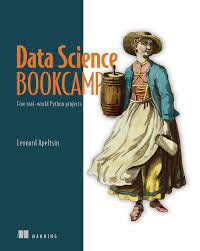

Code for solving case studies from Manning's [Data Science Bookcamp](https://www.manning.com/books/data-science-bookcamp) - book received Nov 11 2021, $39.95 including shipping (from Sep 9 2019 MEAP order).

## Chapter 1 - Computing Probabilities using Python

In [15]:
sample_space = {'Heads', 'Tails'}

In [16]:
probability_heads = 1 / len(sample_space)
print(f'Probability of choosing heads is {probability_heads}')

Probability of choosing heads is 0.5


In [17]:
# defining event conditions
def is_head_or_tails(outcome):
    return outcome in {'Heads', 'Tails'}

def is_neither(outcome):
    return not is_head_or_tails(outcome)

def is_heads(outcome):
    return outcome == 'Heads'

def is_tails(outcome):
    return outcome == 'Tails'

def get_matching_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space if event_condition(outcome)])

In [18]:
event_conditions = {is_head_or_tails, is_heads, is_tails, is_neither}
for event_condition in event_conditions:
    print(f"Event condition: {event_condition.__name__}")
    event = get_matching_event(event_condition, sample_space)
    print(f"Event: {event}\n")

Event condition: is_neither
Event: set()

Event condition: is_head_or_tails
Event: {'Heads', 'Tails'}

Event condition: is_tails
Event: {'Tails'}

Event condition: is_heads
Event: {'Heads'}



In [19]:
def compute_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    return len(event)/len(generic_sample_space)

In [20]:
for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_neither' is 0.0
Probability of event arising from 'is_head_or_tails' is 1.0
Probability of event arising from 'is_tails' is 0.5
Probability of event arising from 'is_heads' is 0.5


Using a biased coin - assuming heads is 4 times more probable than tails is.

In [21]:
weighted_sample_space = {'Heads' : 4, 'Tails':1}

In [22]:
sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5

In [23]:
event = get_matching_event(is_head_or_tails, weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert event_size == 5

In [24]:
def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event)/len(generic_sample_space)
    event_size = sum(generic_sample_space[outcome] for outcome in event)
    return event_size /sum(generic_sample_space.values())
    

In [27]:
print("==== Using a biased coin ====")
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

==== Using a biased coin ====
Probability of event arising from 'is_neither' is 0.0
Probability of event arising from 'is_head_or_tails' is 1.0
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_heads' is 0.8
